In [44]:
from src.solution import MultiODPath, MultiODSolution
from src.problem import MultiODProblem
from src.operators import TwoOptOperator, ExchangeOperator, InsertOperator, OForwardOperator, DBackwardOperator
from src.utils import display_result

p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
paths = [[0, 1, 9, 8, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]
paths1 = [[0, 1, 8, 9, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths2 = [[0, 1, 9, 8, 16, 5, 17, 3, 2, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
s = MultiODSolution(paths2, p)

In [45]:
path = s.paths[0]

In [58]:
path.block_dict

{0: SliceableDeque([Node(node_id=3, OD_type=0, seq_id=2, block_id=0, in_block_seq_id=0, block_OD=0),
                 Node(node_id=4, OD_type=0, seq_id=3, block_id=0, in_block_seq_id=1, block_OD=0),
                 Node(node_id=8, OD_type=0, seq_id=4, block_id=0, in_block_seq_id=2, block_OD=0),
                 Node(node_id=5, OD_type=0, seq_id=5, block_id=0, in_block_seq_id=3, block_OD=0)]),
 6: SliceableDeque([Node(node_id=6, OD_type=0, seq_id=14, block_id=6, in_block_seq_id=0, block_OD=0)]),
 7: SliceableDeque([Node(node_id=14, OD_type=1, seq_id=15, block_id=7, in_block_seq_id=0, block_OD=1)]),
 9: SliceableDeque([Node(node_id=15, OD_type=1, seq_id=17, block_id=9, in_block_seq_id=0, block_OD=1)]),
 10: SliceableDeque([Node(node_id=13, OD_type=1, seq_id=8, block_id=10, in_block_seq_id=0, block_OD=1)]),
 11: SliceableDeque([Node(node_id=7, OD_type=0, seq_id=16, block_id=11, in_block_seq_id=0, block_OD=0)]),
 12: SliceableDeque([Node(node_id=11, OD_type=1, seq_id=6, block_id=12, in_bl

In [65]:
[n for n in path.block_dict[path.O_blocks[0]]]

[Node(node_id=3, OD_type=0, seq_id=2, block_id=0, in_block_seq_id=0, block_OD=0),
 Node(node_id=4, OD_type=0, seq_id=3, block_id=0, in_block_seq_id=1, block_OD=0),
 Node(node_id=8, OD_type=0, seq_id=4, block_id=0, in_block_seq_id=2, block_OD=0),
 Node(node_id=5, OD_type=0, seq_id=5, block_id=0, in_block_seq_id=3, block_OD=0)]

In [62]:
for O in path.O_blocks:
    path.block_dict[O]

[0, 6, 11, 13, 14]

In [47]:
o1 = TwoOptOperator()
o2 = ExchangeOperator()
o3 = InsertOperator()
o4 = OForwardOperator()
o5 = DBackwardOperator()

In [60]:
# improved_path, min_delta, label = o1(s, 4)
improved_path, min_delta, label = o1(s, 15)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))

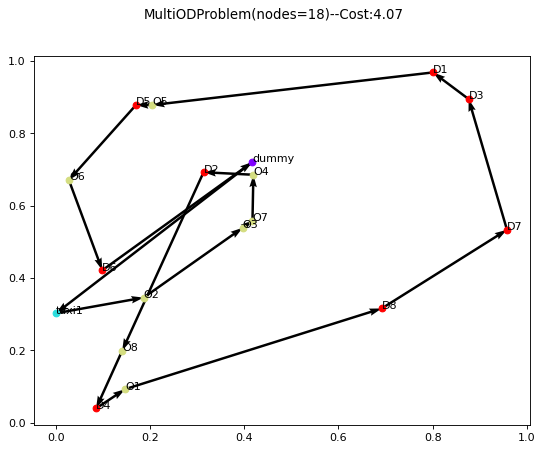

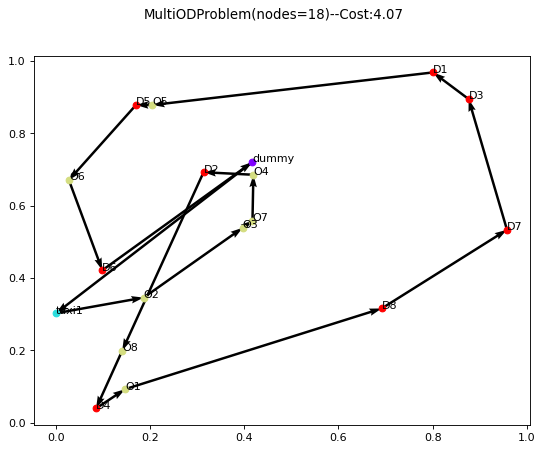

In [61]:
display_result(p, s)

In [14]:
# L2I operators, state

In [15]:
# operators:
# in-block optimization: 2-opt
# O up, D down
# O down, D up 